In [1358]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Load the DataFrame
iris_frame = pd.read_csv("iris_dataset_missing.csv")
heart_frame = pd.read_csv("heart_disease_missing.csv")

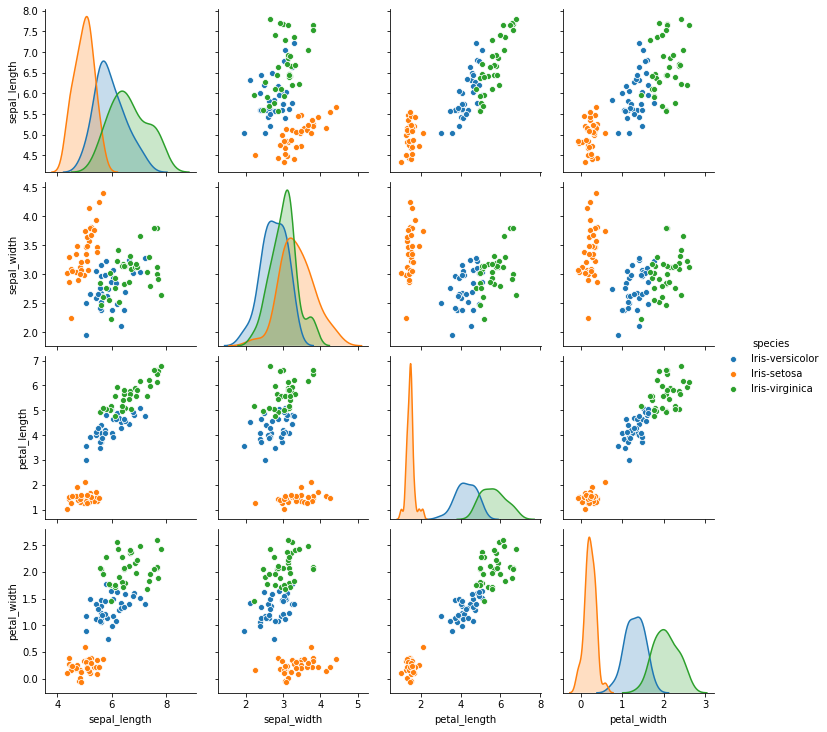

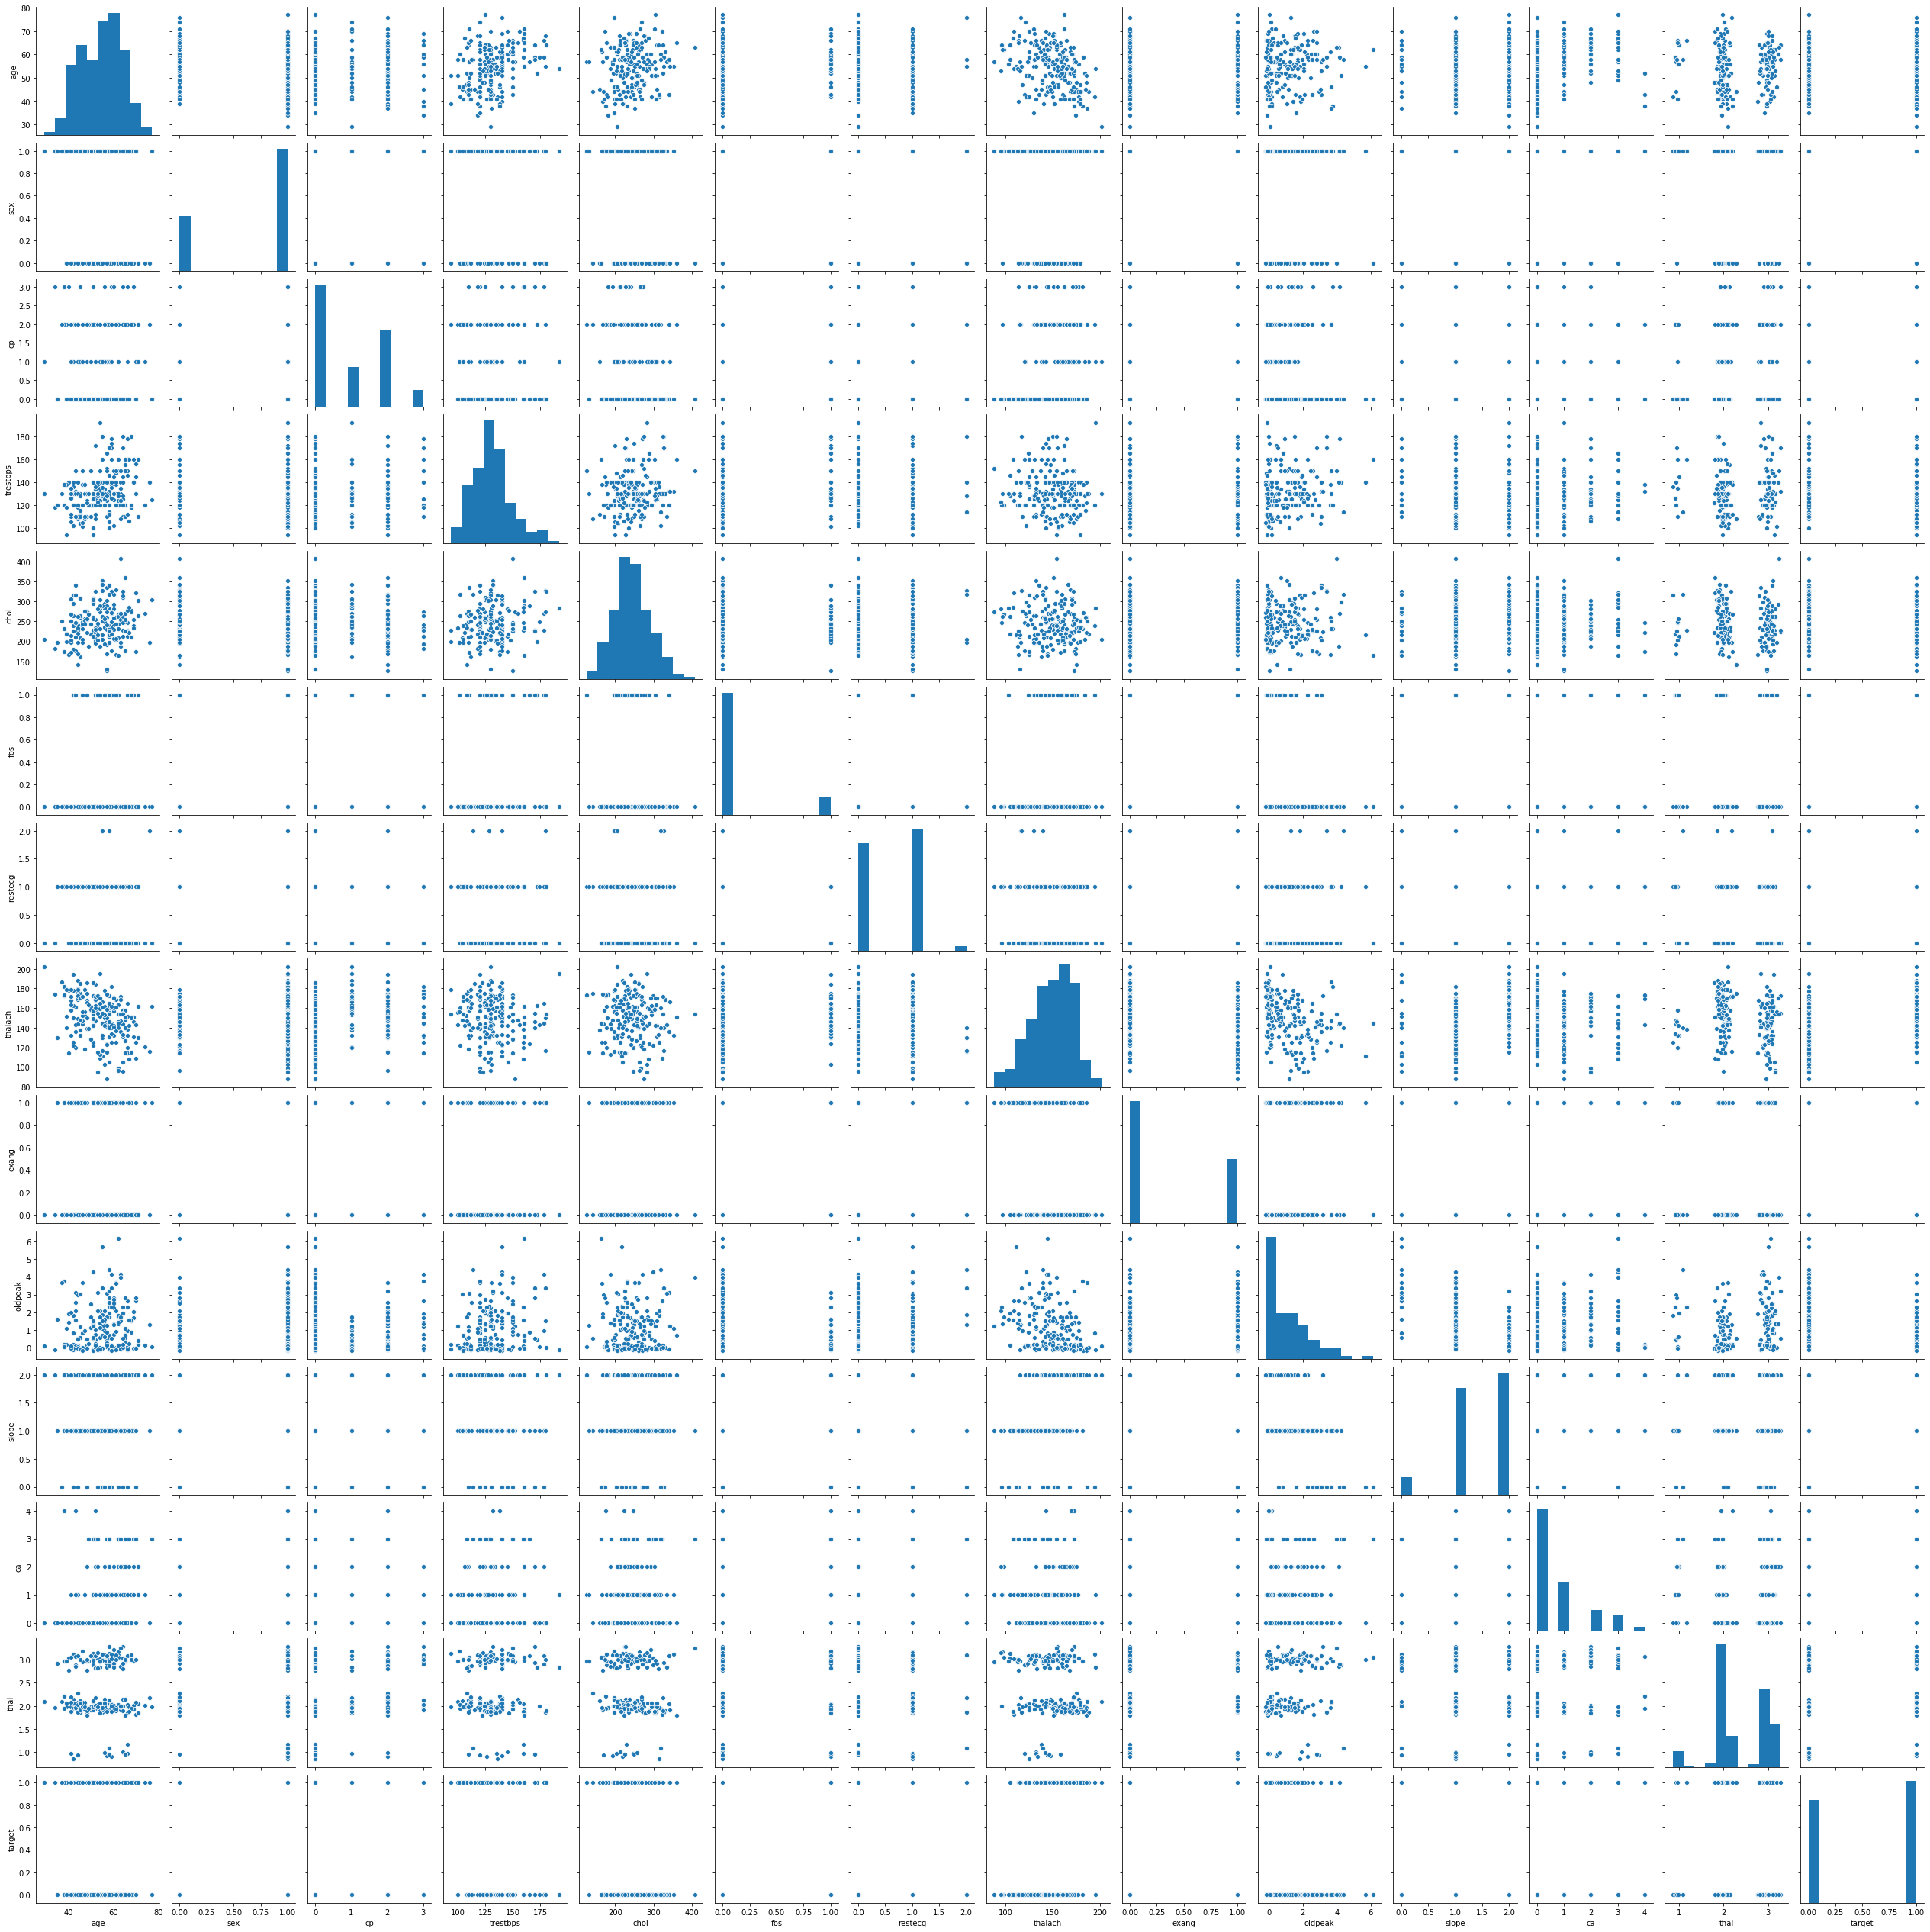

In [1359]:
# Q1.1
# CM1
# Plot the iris_Frame
sns.pairplot(iris_frame, hue="species")
plt.show()
# Plot Heart_Disease Data
sns.pairplot(heart_frame)
plt.show()

In [1360]:
# Calculate the correlation coefficient of all features for Heart Disease dataset 
heart_frame.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.140074,-0.084230,0.335944,0.185861,0.050823,-0.124819,-0.382280,0.114545,0.131735,-0.117989,0.266278,0.049743,-0.196967
sex,-0.140074,1.000000,-0.057939,-0.049906,-0.195213,0.081750,-0.050203,0.017446,0.122773,0.098912,-0.057160,0.120466,0.208391,-0.249428
cp,-0.084230,-0.057939,1.000000,-0.007449,-0.061591,0.057205,0.035935,0.246019,-0.349369,-0.187518,0.156145,-0.180350,-0.141699,0.490819
trestbps,0.335944,-0.049906,-0.007449,1.000000,0.162162,0.138907,-0.106940,-0.100284,0.088717,0.164742,-0.134180,0.080824,0.022495,-0.118476
chol,0.185861,-0.195213,-0.061591,0.162162,1.000000,-0.025549,-0.079196,-0.057679,0.065738,0.048991,0.028301,0.037820,-0.032143,-0.078063
fbs,0.050823,0.081750,0.057205,0.138907,-0.025549,1.000000,-0.110983,0.036934,0.098474,-0.094862,-0.019514,0.128097,0.009830,-0.005276
restecg,-0.124819,-0.050203,0.035935,-0.106940,-0.079196,-0.110983,1.000000,0.016873,-0.036140,-0.065872,0.056843,-0.079777,-0.028263,0.087048
thalach,-0.382280,0.017446,0.246019,-0.100284,-0.057679,0.036934,0.016873,1.000000,-0.360246,-0.351900,0.463824,-0.177231,-0.147013,0.415354
exang,0.114545,0.122773,-0.349369,0.088717,0.065738,0.098474,-0.036140,-0.360246,1.000000,0.279862,-0.314675,0.101805,0.187304,-0.450321
oldpeak,0.131735,0.098912,-0.187518,0.164742,0.048991,-0.094862,-0.065872,-0.351900,0.279862,1.000000,-0.652509,0.194648,0.216788,-0.454241


In [1361]:
# CM1
# Q1.2 (for heart disease)
# Based on the types of data offered, the numerical data will 
# be considered first for the pair plot and later calculations
# Besides, according to the plots and correlation for all features, 
# the distribution of the oldpeak plot with target 1 is significantly different 
# from the distribution with target 0, 
# and the correlation of age and chol is close to 0
# Overall, [age, chol,thalach, oldpeak and target] are chosen as subset features for further research.

In [1362]:
# select columns(features) by name 
subheart_frame=heart_frame.filter(items=['age','chol','oldpeak','thalach','target'])
subheart_frame

,age,chol,oldpeak,thalach,target
0,76,197.105970,1.284822,115.952071,1
1,43,341.049462,3.110483,135.970028,0
2,47,242.822816,-0.023723,152.210039,0
3,51,NaN,1.195082,143.049207,1
4,57,334.952353,3.082052,143.099327,0
...,...,...,...,...,...
207,56,256.189595,0.606726,141.981335,0
208,57,302.985611,NaN,158.992132,1
209,54,232.117551,1.715230,164.977674,1
210,41,214.008059,1.992138,167.851493,1


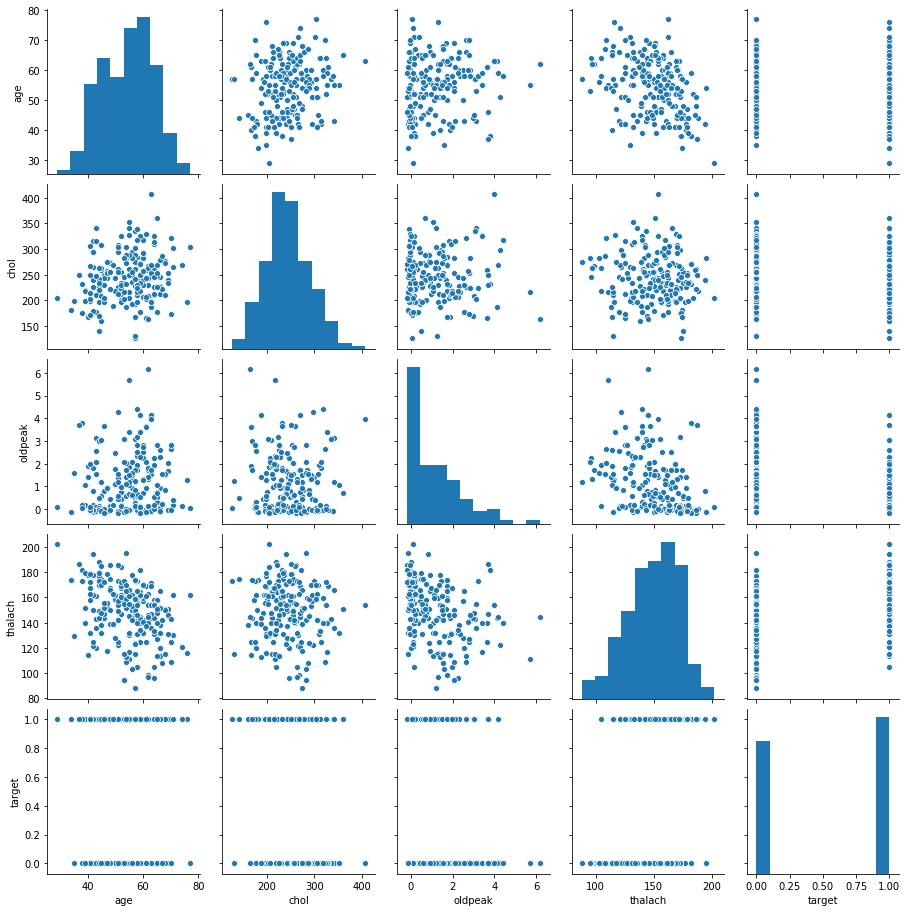

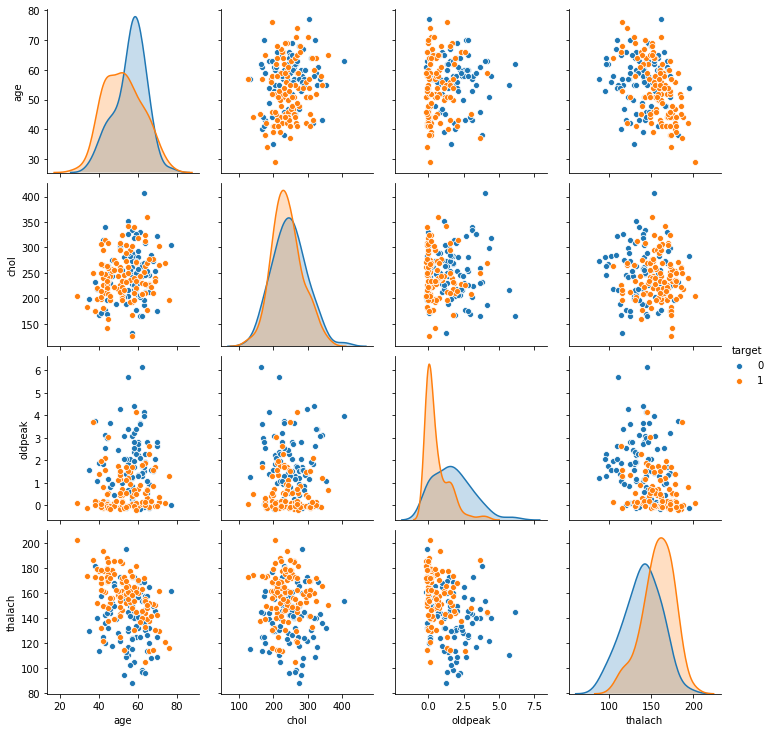

In [1363]:
# Generate the pair plot for the subset features
sns.pairplot(subheart_frame)
plt.show()
sns.pairplot(subheart_frame,hue="target")
plt.show()

In [1364]:
# Q1.7 For heart disease
#CM5
# Check the missing data for subset features
pd.notnull(subheart_frame)


#Keep only the rows with at least 3 non-NA values.
#It is better to drop the rows for missing more than 1 data.
subheart_frame.dropna(thresh=3)

,age,chol,oldpeak,thalach,target
0,76,197.105970,1.284822,115.952071,1
1,43,341.049462,3.110483,135.970028,0
2,47,242.822816,-0.023723,152.210039,0
3,51,NaN,1.195082,143.049207,1
4,57,334.952353,3.082052,143.099327,0
...,...,...,...,...,...
207,56,256.189595,0.606726,141.981335,0
208,57,302.985611,NaN,158.992132,1
209,54,232.117551,1.715230,164.977674,1
210,41,214.008059,1.992138,167.851493,1


In [1365]:
#Drop rows with any NaN in the selected columns only
#Drop the missing data for the 'age' and 'target' features because age is not dependent on other factors
# and 'target' is not numerical data
# so it is not appropriate to fill up with mean or interpolate the data.
subheart_drop= subheart_frame.dropna(subset=['age','target'])
subheart_drop

,age,chol,oldpeak,thalach,target
0,76,197.105970,1.284822,115.952071,1
1,43,341.049462,3.110483,135.970028,0
2,47,242.822816,-0.023723,152.210039,0
3,51,NaN,1.195082,143.049207,1
4,57,334.952353,3.082052,143.099327,0
...,...,...,...,...,...
207,56,256.189595,0.606726,141.981335,0
208,57,302.985611,NaN,158.992132,1
209,54,232.117551,1.715230,164.977674,1
210,41,214.008059,1.992138,167.851493,1


In [1366]:
#to interpolate the missing values for the oldpeak,thalach and chol features
subheart_clean=subheart_drop.interpolate(method='linear',limit_direction='forward')
subheart_clean

,age,chol,oldpeak,thalach,target
0,76,197.105970,1.284822,115.952071,1
1,43,341.049462,3.110483,135.970028,0
2,47,242.822816,-0.023723,152.210039,0
3,51,288.887585,1.195082,143.049207,1
4,57,334.952353,3.082052,143.099327,0
...,...,...,...,...,...
207,56,256.189595,0.606726,141.981335,0
208,57,302.985611,1.160978,158.992132,1
209,54,232.117551,1.715230,164.977674,1
210,41,214.008059,1.992138,167.851493,1


In [1367]:
# Final check, are there anywhere NaNs in the data, if yes, where?
subheart_clean.isnull().any()

age        False
chol       False
oldpeak    False
thalach    False
target     False
dtype: bool

In [1368]:
# Q1.3
# CM2
# Calculate the correlation Coefficients for the Iris dataset
iris_corr = iris_frame.corr()
print(iris_corr)
# Calculate the correlation coefficient for the Heart Disease subset
# All subset features for Q1.3 have been cleaned by dealing with the missing values for Q1.7
# Therefore, the name of the dataset is subheart_clean instead of subheart_frame
subheart_corr=subheart_clean.corr()
print(subheart_corr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.031792      0.880635     0.809915
sepal_width      -0.031792     1.000000     -0.285793    -0.267574
petal_length      0.880635    -0.285793      1.000000     0.958274
petal_width       0.809915    -0.267574      0.958274     1.000000
              age      chol   oldpeak   thalach    target
age      1.000000  0.163386  0.131899 -0.383527 -0.196967
chol     0.163386  1.000000  0.059598 -0.039059 -0.066440
oldpeak  0.131899  0.059598  1.000000 -0.352459 -0.444450
thalach -0.383527 -0.039059 -0.352459  1.000000  0.418747
target  -0.196967 -0.066440 -0.444450  0.418747  1.000000


In [1369]:
# For Iris dataset
# From the correlation calculated it was found that the correlation coefficient
# between petal_length and sepal_length, petal_width and sepal_length, petal_width
# and petal_length are 0.8806, 0.8099 and 0.9582 respectively. These three pairs are
# strongly correlated

# For Heart Disease dataset
#According to the correlation coefficient above, thalach has a positive relationship with the target. 
#However,chol and oldpeak and age have the negative relationship with the target. the absolute value of the relationship
#between thalach and target, oldpeak and target are 0.42 and 0.44. which means there is a correlation between two variables 
# but it is relatively weak and likely unimportant. 
#The absolute value of the correlation between chol and target, age and target are 0.066and 0.20, which means
#there is almost no linear relationship between them.

In [1370]:
# Q1.4
# CM2
# Calculate the mean, variance, skew, kurtosis for the datasets
iris_mean = iris_frame.mean()
iris_var = iris_frame.var()
iris_skew = iris_frame.skew()
iris_kurtosis = iris_frame.kurtosis()
subheart_mean=subheart_clean.mean()
subheart_var=subheart_clean.var()
subheart_skew=subheart_clean.skew()
subheart_kurtosis=subheart_clean.kurtosis()

In [1371]:
# Mean for all feature
print(iris_mean)
print(subheart_mean)

sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64
age         54.311321
chol       243.763032
oldpeak      1.101916
thalach    149.677581
target       0.542453
dtype: float64


In [1372]:
# Variance for all feature
print(iris_var)
print(subheart_var)

sepal_length    0.742420
sepal_width     0.207131
petal_length    3.216602
petal_width     0.619672
dtype: float64
age          83.637217
chol       2120.262469
oldpeak       1.514679
thalach     480.005968
target        0.249374
dtype: float64


In [1373]:
# Skew for all feature
print(iris_skew)
print(subheart_skew)

sepal_length    0.401506
sepal_width     0.367708
petal_length   -0.255767
petal_width    -0.074751
dtype: float64
age       -0.106027
chol       0.331050
oldpeak    1.246814
thalach   -0.400605
target    -0.171644
dtype: float64


In [1374]:
# # kurtosis for all feature
print(iris_kurtosis)
print(subheart_kurtosis)

sepal_length   -0.544820
sepal_width     0.510490
petal_length   -1.389810
petal_width    -1.315451
dtype: float64
age       -0.561563
chol       0.260942
oldpeak    1.515449
thalach   -0.179199
target    -1.989397
dtype: float64


In [1375]:
# For Iris:
# The Petal_length has large variance relative to mean which indicates the Petal_length
# data are widely spread.
# From the skewness calculation, it seems all feature except petal_width has some level of skewness
# From kurtosis calculation, it shows all four feature have quite few large or small
# samples.
# All these calculations, indicates that the data for all these feature are not normally
# distribution. These could be caused by the same sample size.

# For Heart Disease
# The variance of the chol dataset is very large relative to the mean value which means the chol dataset spread out widely. 
# The skew of oldpeak dataset is 1.25 (greater than 1 ), which means the data are highly skewed and asymmetric.
# The skew of age, chol, thalach and target datasets are all fairly symmetric.
# The kurtosis of chol and thalach is close to 0, which means a normal distribution can be assumed to these features
# The kurtosis of age and target are negative which means the distribution is light tails,
# the distribution of oldpeak has heavier tails with 1.515 kurtosis.
# By analyzing the mean, variance,skew and kurtosis together, we can know that the chol feature has the most fairly normal
# distribution and other features are not normally distributed. 

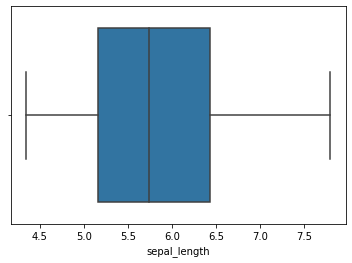

In [1376]:
# Q1.5
# CM3
# For Iris
# Use Box plot to identify the outlier
# For Sepal_length
B_Plot_sepal_length = sns.boxplot(x ="sepal_length", data=iris_frame)

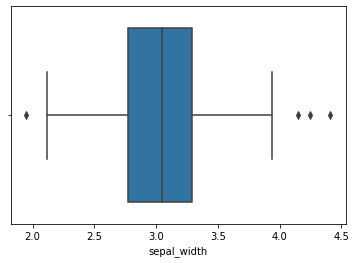

In [1377]:
# For Sepal_Width
B_Plot_sepal_width = sns.boxplot(x ="sepal_width", data=iris_frame)

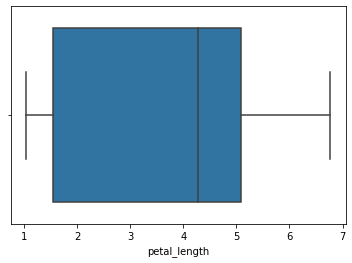

In [1378]:
# For Petal_length
B_Plot_petal_length = sns.boxplot(x ="petal_length", data=iris_frame)

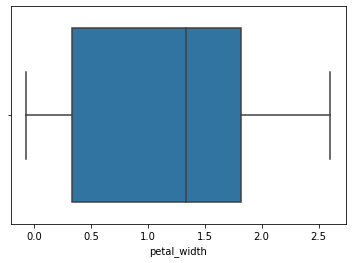

In [1379]:
# For Petal_Width
B_Plot_petal_width = sns.boxplot(x ="petal_width",  data=iris_frame)

In [1380]:
# There are 4 points needs to be removed from sepal_width. These were
# determined by box plot which shows there are four outliers.

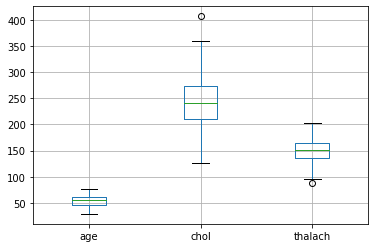

In [1381]:
# For Heart Disease
# Generate the boxplot to detect the outliers.
subheart_clean.boxplot(column=['age','chol','thalach'])

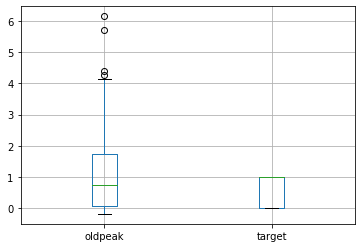

In [1382]:
subheart_clean.boxplot(column=['oldpeak','target'])

In [1383]:
# According to the boxplot above, there is 1 outlier in chol feature,
# 1 outlier in thalach and 4 outliers in oldpeak feature that should be removed

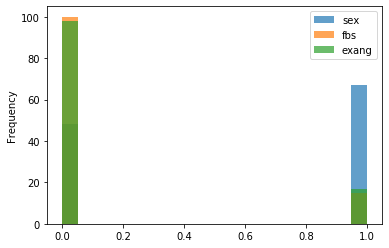

In [1384]:
# Q1.6
# CM4
# Group the Binary features with the target to be 1
heart_binary1=heart_frame.loc[(heart_frame["target"] ==1),['sex','fbs','exang','target']].filter(items=['sex','fbs','exang'])
# Plot the histogram to see the distribution of the Binary features when target=1,transparency to be 70%
heart_binary1.plot.hist(bins=20,alpha=0.7)

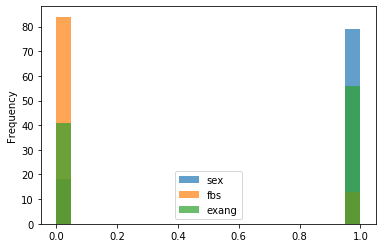

In [1385]:
# Group the Binary features with the target to be 0
heart_binary0=heart_frame.loc[(heart_frame["target"] ==0),['sex','fbs','exang','target']].filter(items=['sex','fbs','exang'])
# Plot the histogram to see the distribution of the Binary features when target=0,transparency to be 70%
heart_binary0.plot.hist(bins=20,alpha=0.7)

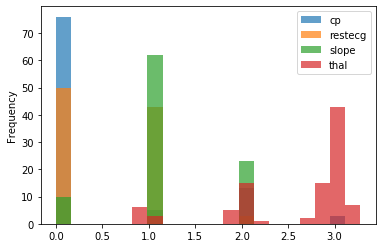

In [1386]:
# Group the Categorical features with the target to be 0
heart_cate0=heart_frame.loc[(heart_frame["target"] ==0),['cp','restecg','slope','thal','target']].filter(items=['cp','restecg','slope','thal'])
# Plot the histogram to see the distribution of the Categorical features when target=0
heart_cate0.plot.hist(bins=20,alpha=0.7)

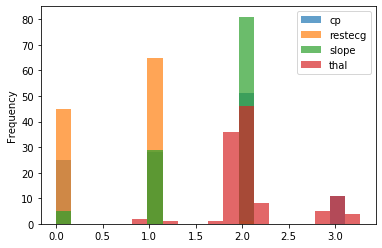

In [1387]:
# Group the Categorical features with the target to be 1
heart_cate1=heart_frame.loc[(heart_frame["target"] ==1),['cp','restecg','slope','thal','target']].filter(items=['cp','restecg','slope','thal'])
# Plot the histogram to see the distribution of the Categorical features when target=1
heart_cate1.plot.hist(bins=20,alpha=0.7)

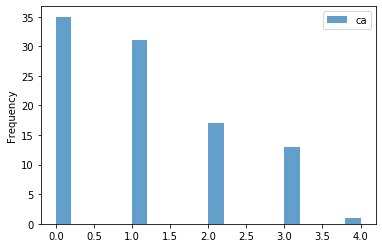

In [1388]:
# Group the Ordinal features with the target to be 0
heart_ord0=heart_frame.loc[(heart_frame["target"] ==0),['ca','target']].filter(items=['ca'])
# Plot the histogram to see the distribution of the Ordinal features when target=0
heart_ord0.plot.hist(bins=20,alpha=0.7)

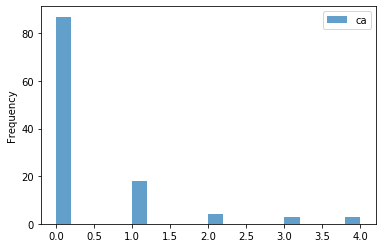

In [1389]:
# Group the Ordinal features with the target to be 1
heart_ord1=heart_frame.loc[(heart_frame["target"] ==1),['ca','target']].filter(items=['ca'])
# Plot the histogram to see the distribution of the Ordinal features when target=1
heart_ord1.plot.hist(bins=20,alpha=0.7)

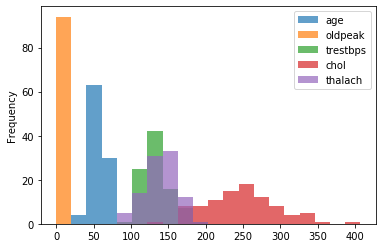

In [1390]:
# Group the Numeric features with the target to be 0
heart_num0=heart_frame.loc[(heart_frame["target"] ==0),['age','oldpeak','trestbps','chol','thalach','target']].filter(items=['age','oldpeak','trestbps','chol','thalach'])
# Plot the histogram to see the distribution of the Numeric features when target=0
heart_num0.plot.hist(bins=20,alpha=0.7)

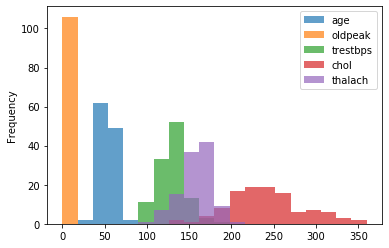

In [1391]:
# Group the Numeric features with the target to be 1
heart_num1=heart_frame.loc[(heart_frame["target"] ==1),['age','oldpeak','trestbps','chol','thalach','target']].filter(items=['age','oldpeak','trestbps','chol','thalach'])
# Plot the histogram to see the distribution of the Numeric features when target=1
heart_num1.plot.hist(bins=20,alpha=0.7)

In [1392]:
# All histograms listed above indicate the number of present and absent heart disease cases for each feature categorized. 
# Based on the histograms for exang, thal and cp, there is a huge difference in the features' distribution categorized
# by target=1 (heart disease) and target=0 (no heart disease), which means these features might have the strong relationship
# with the heart disease. 

In [1393]:
#Q1.7
# Data Cleaning
# CM5
# For Iris
print(iris_frame.sort_values(by=["species", "sepal_length"]))
# Will use both Mean interpolation and removing to fill the missing value
# The reason for choosing interpolation is that from Pair plot in Q1.1, petal_length and
# and petal_width are well separated base on different species. Filling the missing number on
# these feature by interpolation should not introduce any error. Since the distribution for sepal_length
# and sepal_width are crossed over for different species, we should just remove the data
# if there are missing values
# Changes
# 1. 5.205867863 Nan 1.675654313 0.112268914	Iris-setosa
# 2. 6.365979198 Nan 4.964904913 1.817211132	Iris-virginica
# 3. 6.265589824 Nan 4.701305999 1.290187033	Iris-versicolor
# 4. 6.340343808 Nan 4.302988998 1.33179723	    Iris-versicolor
# All four data are removed as there are missing value in sepal_width
# 5. 5.496342449 3.098269638 Nan->1.428415022 0.242852756	Iris-setosa
# 6. 5.040515514 3.466343995 Nan->1.35792686 0.314548132	Iris-setosa
# 7. 5.673096306 4.409564796 Nan->1.45346559 0.370518032	Iris-setosa
# 8. 5.817283479 2.633799572 Nan->3.866748154 1.141346914	Iris-versicolor
# 9. 5.847159631 2.743619193 Nan->5.062244481 0.748681456	Iris-versicolor
# 10. 5.911822486 2.560512048 Nan->5.036730295 1.766512597	Iris-virginica
# 11. 6.235535856 3.425253417 Nan->5.947275694 2.423052828	Iris-virginica
# 12. 6.271779874 2.521065129 Nan->4.751795232 1.896625593	Iris-virginica
# All eight data are filled by using interpolation with number from same
# Species

    sepal_length  sepal_width  petal_length  petal_width         species
80      4.344007     3.018625      1.033031     0.104012     Iris-setosa
25      4.421580     3.298713      1.503468     0.276315     Iris-setosa
8       4.436832     2.867772      1.428415     0.385249     Iris-setosa
41      4.496342     3.098270           NaN     0.242853     Iris-setosa
51      4.511538     2.242837      1.253850     0.165851     Iris-setosa
..           ...          ...           ...          ...             ...
47      7.647749     3.131452      6.118435     2.603123  Iris-virginica
38      7.665933     3.802924      6.463494     2.086840  Iris-virginica
22      7.675210     3.002285      6.625518     2.076276  Iris-virginica
23      7.709652     2.917714      6.575132     1.883693  Iris-virginica
71      7.795561     2.643068      6.768611     2.424502  Iris-virginica

[105 rows x 5 columns]


In [1394]:
# For subset 'age','chol','oldpeak','thalach','target'
# 1. Keep only the rows with at least 3 non-NA values and drop the rows for missing more than 1 data.
# 2. Drop the missing data for the 'age' and 'target' features because age is not dependent on other factors
# and 'target' is not numerical data so it is not appropriate to fill up with mean or interpolate the data.
# 3. Interpolate the missing values for the oldpeak,thalach and chol features


In [1395]:
# Note
# Question 1 data selection explanation (heart disease dataset only)

# I chose the subset features based on pair plots and correlation to indicate the
# relationship of aga,chol,oldpeak,thalach and target at the
# beginning. However, by testing all the features in the model we created (from question2,3 and 4) and comparing the performance,
# we chose to re-select the subset features: age,cp,thal,ca,exang which has a better performance on Kaggle.
# Also, the dataset is cleaned by trying different methods in question 2 for better performance, more details will be showed in Q2.

In [1396]:
#Q2.1
# Load full Data
iris_frame_full = pd.read_csv("iris_dataset.csv")
iris_frame_X = iris_frame_full[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
iris_frame_Y = iris_frame_full[["species"]]
mapping = {'Iris-versicolor': 1, 'Iris-setosa': 0, 'Iris-virginica': 2}
iris_frame_Y = iris_frame_Y.replace({'species': mapping})
# Split the Training, Test and Validation Model
x_train_val, x_test, y_train_val, y_test  = \
    train_test_split(iris_frame_X, iris_frame_Y, test_size=0.2, random_state=275)

x_train, x_val, y_train, y_val  = \
    train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=275)
# Define array to store Accuracy
acc = []
# Defalut KNN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc.append(metrics.accuracy_score(y_test, y_pred))

# Optimize the parameter
k_array = [1, 5, 10, 15, 20, 25, 30, 35]
for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    acc.append(metrics.accuracy_score(y_val, y_pred))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Text(0.5, 1.0, 'Validation Accuracy at different Neighbors Number')

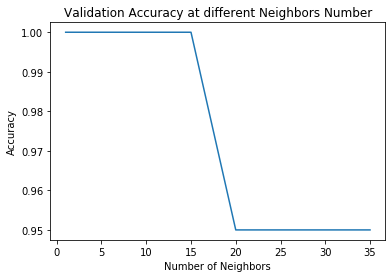

In [1397]:
# Plot Accuracy Versus different K
plt.plot(k_array, acc[1:])
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different Neighbors Number")

In [1398]:
# From plot it is obvious to see that K = 1, 5 and 15 produces the best accuracy
# For our model, consider the amount of computational resource and generalization,
# I will pick K = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
# Compute AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
AUC = metrics.auc(fpr, tpr)
# AUC = metrics.roc_auc_score(y_test, y_pred, multi_class="ovr")
# Compute F1 Score
# CM7
F_Score = metrics.f1_score(y_test, y_pred, average='micro')
print("Following are the Accuracy, AUC and F_Score when K = 5")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)


Following are the Accuracy, AUC and F_Score when K = 5
Accuracy: 0.9047619047619048
AUC: 0.9326923076923077
F_Score: 0.9047619047619048


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [1399]:
# There are two ways to normalize the data, one is normalize and the other
# standardize, I will try both
# Min_Max_Normalize
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(iris_frame_X)
x_normal = pd.DataFrame(x_scaled)
print(x_normal)
# Split the Training, Test and Validation Model
x_train_val_normal, x_test_normal, y_train_val_normal, y_test_normal  = \
    train_test_split(x_normal, iris_frame_Y, test_size=0.2, random_state=275)

x_train_normal, x_val_normal, y_train_normal, y_val_normal  = \
    train_test_split(x_train_val_normal, y_train_val_normal, test_size=0.25, random_state=275)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_normal, y_train_normal)
y_pred_normal = knn.predict(x_val_normal)
accuracy = metrics.accuracy_score(y_val_normal, y_pred_normal)
# Compute AUC
fpr, tpr, thresholds = metrics.roc_curve(y_val_normal, y_pred_normal, pos_label=2)
AUC = metrics.auc(fpr, tpr)
# Compute F1 Score
F_Score = metrics.f1_score(y_val_normal, y_pred_normal, average='micro')
print("Metrics By Using Data Normalization")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)

# Standardize
x_standard = StandardScaler().fit_transform(iris_frame_X)
# Split the Training, Test and Validation Model
x_train_val_standard, x_test_standard, y_train_val_standard, y_test_standard  = \
    train_test_split(x_standard, iris_frame_Y, test_size=0.2, random_state=275)

x_train_standard, x_val_standard, y_train_standard, y_val_standard  = \
    train_test_split(x_train_val_standard, y_train_val_standard, test_size=0.25, random_state=275)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_standard, y_train_standard)
y_pred_standard = knn.predict(x_val_standard)
accuracy = metrics.accuracy_score(y_val_standard, y_pred_standard)
# Compute AUC
fpr, tpr, thresholds = metrics.roc_curve(y_val_standard, y_pred_standard, pos_label=2)
AUC = metrics.auc(fpr, tpr)
# Compute F1 Score
F_Score = metrics.f1_score(y_val_standard, y_pred_standard, average='micro')
print("Metrics By Using Data Standardizing")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)

            0         1         2         3
0    0.000000  0.435393  0.000000  0.065867
1    0.022475  0.549086  0.082021  0.130271
2    0.026894  0.374159  0.068935  0.170989
3    0.044135  0.467722  0.068935  0.117763
4    0.048538  0.120487  0.038500  0.088981
..        ...       ...       ...       ...
96   0.957175  0.481192  0.886642  1.000000
97   0.962444  0.753754  0.946803  0.807021
98   0.965131  0.428761  0.975052  0.803072
99   0.975110  0.394432  0.966267  0.731087
100  1.000000  0.282948  1.000000  0.933234

[101 rows x 4 columns]
Metrics By Using Data Normalization
Accuracy: 1.0
AUC: 1.0
F_Score: 1.0
Metrics By Using Data Standardizing
Accuracy: 1.0
AUC: 1.0
F_Score: 1.0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [1400]:
# It seems both Data Normalization and Standardization works, I will pick Data normalization
# Test with KNN Option
# Euclidean
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(x_train_normal, y_train_normal)
y_pred_normal = knn.predict(x_val_normal)
accuracy = metrics.accuracy_score(y_val_normal, y_pred_normal)
# Compute AUC
fpr, tpr, thresholds = metrics.roc_curve(y_val_normal, y_pred_normal, pos_label=2)
AUC = metrics.auc(fpr, tpr)
# Compute F1 Score
F_Score = metrics.f1_score(y_val_normal, y_pred_normal, average='micro')
print("Metrics By Using Data euclidean Distance")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)
# manhattan
knn = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn.fit(x_train_normal, y_train_normal)
y_pred_normal = knn.predict(x_val_normal)
accuracy = metrics.accuracy_score(y_val_normal, y_pred_normal)
# Compute AUC
fpr, tpr, thresholds = metrics.roc_curve(y_val_normal, y_pred_normal, pos_label=2)
AUC = metrics.auc(fpr, tpr)
# Compute F1 Score
F_Score = metrics.f1_score(y_val_normal, y_pred_normal, average='micro')
print("Metrics By Using Data manhattan Distance")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)
# There is no difference between different distance metric, The Default metric is used
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_normal, y_train_normal)
y_pred_normal = knn.predict(x_test_normal)
accuracy = metrics.accuracy_score(y_test_normal, y_pred_normal)
# Compute AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test_normal, y_pred_normal, pos_label=2)
AUC = metrics.auc(fpr, tpr)
# Compute F1 Score

F_Score = metrics.f1_score(y_test_normal, y_pred_normal, average='micro')
# CM7
print("After some work, it found that the KNN model can be improved when K =5 \n"
      , "Data normalization and euclidean distance")
print("Final Accuracy, AUC and F_Score for improved KNN")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)

Metrics By Using Data euclidean Distance
Accuracy: 1.0
AUC: 1.0
F_Score: 1.0
Metrics By Using Data manhattan Distance
Accuracy: 1.0
AUC: 1.0
F_Score: 1.0
After some work, it found that the KNN model can be improved when K =5 
 Data normalization and euclidean distance
Final Accuracy, AUC and F_Score for improved KNN
Accuracy: 0.9047619047619048
AUC: 0.9326923076923077
F_Score: 0.9047619047619048


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:33: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [1401]:
# Competition
# Load full Data
iris_frame_Test = pd.read_csv("Comp/iris_test.csv")
iris_frame_X_Test = iris_frame_Test[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
iris_frame_X_Test['sepal_length'] = iris_frame_X_Test['sepal_length'].div(7.795560938)
iris_frame_X_Test['sepal_width'] = iris_frame_X_Test['sepal_width'].div(4.409565)
iris_frame_X_Test['petal_length'] = iris_frame_X_Test['petal_length'].div(6.768611)
iris_frame_X_Test['petal_width'] = iris_frame_X_Test['petal_width'].div(2.603123)

y_pred_normal = knn.predict(iris_frame_X_Test)
y_pred_normal = pd.DataFrame(y_pred_normal)
y_pred_normal.to_csv('iris_out.csv', sep='\t', encoding='utf-8', index=False)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [1402]:
# Q2.1
# Heart Disease data
# Load full Data
# From Question 1
heart_frame_full = pd.read_csv("heart_disease.csv").dropna()
heart_frame_X = heart_frame_full[["age", "cp",'thal', 'ca', 'exang']]
heart_frame_Y = heart_frame_full[["target"]]
# Split the Training, Test and Validation Model
x_train_val_h, x_test_h, y_train_val_h, y_test_h  = \
    train_test_split(heart_frame_X, heart_frame_Y, test_size=0.2, random_state=275)

x_train_h, x_val_h, y_train_h, y_val_h  = \
    train_test_split(x_train_val_h, y_train_val_h, test_size=0.25, random_state=275)
# Define array to store Accuracy
acc = []
# Defalut KNN model
knn = KNeighborsClassifier()
knn.fit(x_train_h, y_train_h)
y_pred_h = knn.predict(x_test_h)
acc.append(metrics.accuracy_score(y_test_h, y_pred_h))

# Optimize the parameter
k_array = [1, 5, 10, 15, 20, 25, 30, 35]
for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_h, y_train_h)
    y_pred_h = knn.predict(x_val_h)
    acc.append(metrics.accuracy_score(y_val_h, y_pred_h))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Text(0.5, 1.0, 'Validation Accuracy at different Neighbors Number')

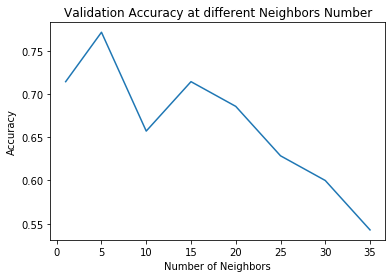

In [1403]:
# Plot Accuracy Versus different K
plt.plot(k_array, acc[1:])
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy at different Neighbors Number")

In [1404]:
# From plot it is obvious to see that K = 5 produces the best accuracy
# For our model, consider the amount of computational resource and generalization,
# I will pick K = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_h, y_train_h)
y_pred_h = knn.predict(x_test_h)
accuracy = metrics.accuracy_score(y_test_h, y_pred_h)
# Compute AUC
AUC = metrics.roc_auc_score(y_test_h, y_pred_h, multi_class="ovr")
# Compute F1 Score
F_Score = metrics.f1_score(y_test_h, y_pred_h, average='micro')
# CM7
print("Following are the Accuracy, AUC and F_Score when K = 5")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)

Following are the Accuracy, AUC and F_Score when K = 5
Accuracy: 0.7714285714285715
AUC: 0.769607843137255
F_Score: 0.7714285714285715


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [1405]:
# There are two ways to normalize the data, one is normalize and the other
# standardize, I will try both
# Min_Max_Normalize
x_scaled = pd.read_csv("heart_disease.csv").dropna()
x_scaled_h = x_scaled[["age", "cp",'thal', 'ca', 'exang']]
x_scaled_h['age'] = x_scaled_h['age'].div(71)
#x_scaled_h['sex'] = x_scaled_h['sex'].div(1)
x_scaled_h['cp'] = x_scaled_h['cp'].div(3)
x_scaled_h['ca'] = x_scaled_h['ca'].div(4)
#x_scaled_h['chol'] = x_scaled_h['chol'].div(564)
#x_scaled_h['oldpeak'] = x_scaled_h['oldpeak'].div(4)
x_scaled_h['thal'] = x_scaled_h['thal'].div(3)
x_scaled_h['exang'] = x_scaled_h['exang'].div(1)
#x_scaled_h['thalach'] = x_scaled_h['thalach'].div(202.138)
x_normal_h = pd.DataFrame(x_scaled_h)
# Split the Training, Test and Validation Model
x_train_val_normal_h, x_test_normal_h, y_train_val_normal_h, y_test_normal_h  = \
    train_test_split(x_normal_h, heart_frame_Y, test_size=0.2, random_state=275)

x_train_normal_h, x_val_normal_h, y_train_normal_h, y_val_normal_h  = \
    train_test_split(x_train_val_normal_h, y_train_val_normal_h, test_size=0.25, random_state=275)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_normal_h, y_train_normal_h)
y_pred_normal_h = knn.predict(x_val_normal_h)
accuracy = metrics.accuracy_score(y_val_normal_h, y_pred_normal_h)
# Compute AUC
AUC = metrics.roc_auc_score(y_val_normal_h, y_pred_normal_h, multi_class="ovr")
# Compute F1 Score
F_Score = metrics.f1_score(y_val_normal_h, y_pred_normal_h, average='micro')
print("Metrics By Using Data Normalization")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)

heart_frame_X  = pd.read_csv("heart_disease.csv").dropna()
heart_frame_X_S = heart_frame_X[["age", "cp",'thal', 'ca', 'exang']]
heart_frame_X_S['age'] = heart_frame_X_S['age'].sub(54.6080586080586)
#heart_frame_X_S['sex'] = heart_frame_X_S['sex'].sub(0.684981684981685)
heart_frame_X_S['cp'] = heart_frame_X_S['cp'].sub(0.967032967032967)
#heart_frame_X_S['oldpeak'] = heart_frame_X_S['oldpeak'].sub(1.04201333955311)
heart_frame_X_S['thal'] = heart_frame_X_S['thal'].sub(2.31628389594853)
heart_frame_X_S['exang'] = heart_frame_X_S['exang'].sub(0.333333333333333)
#heart_frame_X_S['thalach'] = heart_frame_X_S['thalach'].sub(149.393605910366)
heart_frame_X_S['age'] = heart_frame_X_S['age'].div(9.13854740163609)
#heart_frame_X_S['sex'] = heart_frame_X_S['sex'].div(0.46452317081211)
heart_frame_X_S['cp'] = heart_frame_X_S['cp'].div(1.02835851401416)
#heart_frame_X_S['oldpeak'] = heart_frame_X_S['oldpeak'].div(1.19841051930258)
heart_frame_X_S['thal'] = heart_frame_X_S['thal'].div(0.615565916709764)
heart_frame_X_S['exang'] = heart_frame_X_S['exang'].div(0.471404520791032)
#heart_frame_X_S['thalach'] = heart_frame_X_S['thalach'].div(23.272114208039)

x_train_val_standard_h, x_test_standard_h, y_train_val_standard_h, y_test_standard_h  = \
    train_test_split(heart_frame_X_S, heart_frame_Y, test_size=0.2, random_state=275)

x_train_standard_h, x_val_standard_h, y_train_standard_h, y_val_standard_h  = \
    train_test_split(x_train_val_standard_h, y_train_val_standard_h, test_size=0.25, random_state=275)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_standard_h, y_train_standard_h)
y_pred_standard_h = knn.predict(x_val_standard_h)
accuracy = metrics.accuracy_score(y_val_standard_h, y_pred_standard_h)
# Compute AUC
AUC = metrics.roc_auc_score(y_val_standard_h, y_pred_standard_h, multi_class="ovr")
# Compute F1 Score
F_Score = metrics.f1_score(y_val_standard_h, y_pred_standard_h, average='micro')
print("Metrics By Using Data Standardizing")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)

Metrics By Using Data Normalization
Accuracy: 0.8857142857142857
AUC: 0.9130434782608696
F_Score: 0.8857142857142857
Metrics By Using Data Standardizing
Accuracy: 0.8571428571428571
AUC: 0.8913043478260869
F_Score: 0.8571428571428571


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [1406]:
# It seems data normalization works better
heart_frame_full = pd.read_csv("heart_disease.csv").dropna()
heart_frame_X = heart_frame_full[["age", "cp",'thal', 'ca', 'exang']]
heart_frame_X['age'] = heart_frame_X['age'].div(71)
#heart_frame_X['sex'] = heart_frame_X['sex'].div(1)
heart_frame_X['cp'] = heart_frame_X['cp'].div(3)
heart_frame_X['ca'] = heart_frame_X['ca'].div(4)
#heart_frame_X['chol'] = heart_frame_X['chol'].div(564)
#heart_frame_X['oldpeak'] = heart_frame_X['oldpeak'].div(4)
heart_frame_X['thal'] = heart_frame_X['thal'].div(3)
heart_frame_X['exang'] = heart_frame_X['exang'].div(1)
#heart_frame_X['thalach'] = heart_frame_X['thalach'].div(202.138)
heart_frame_Y = heart_frame_full[["target"]]
# Split the Training, Test and Validation Model
x_train_val_h, x_test_h, y_train_val_h, y_test_h  = \
    train_test_split(heart_frame_X, heart_frame_Y, test_size=0.2, random_state=275)

x_train_h, x_val_h, y_train_h, y_val_h  = \
    train_test_split(x_train_val_h, y_train_val_h, test_size=0.25, random_state=275)
# Test with KNN Option
# Euclidean
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(x_train_h, y_train_h)
y_pred_h = knn.predict(x_val_h)
accuracy = metrics.accuracy_score(y_val_h, y_pred_h)
# Compute AUC
AUC = metrics.roc_auc_score(y_val_h, y_pred_h, multi_class="ovr")
# Compute F1 Score
F_Score = metrics.f1_score(y_val_h, y_pred_h, average='micro')
print("Metrics By Using Data euclidean Distance")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)
# manhattan
knn = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn.fit(x_train_h, y_train_h)
y_pred_h = knn.predict(x_val_h)
accuracy = metrics.accuracy_score(y_val_h, y_pred_h)
# Compute AUC
AUC = metrics.roc_auc_score(y_val_h, y_pred_h, multi_class="ovr")
# Compute F1 Score
F_Score = metrics.f1_score(y_val_h, y_pred_h, average='micro')
print("Metrics By Using Data manhattan Distance")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)
# The euclidean Distance worked best
knn = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn.fit(x_train_h, y_train_h)
y_pred_h = knn.predict(x_test_h)
accuracy = metrics.accuracy_score(y_test_h, y_pred_h)
# Compute AUC
AUC = metrics.roc_auc_score(y_test_h, y_pred_h, multi_class="ovr")
# Compute F1 Score
F_Score = metrics.f1_score(y_test_h, y_pred_h, average='micro')
# CM7
print("After some work, it found that the KNN model can be improved when K =5 \n"
      , "Data normalization and euclidean distance")
print("Final Accuracy with Data Standardization and euclidean distance metric")
print("Accuracy:" , accuracy)
print("AUC:" , AUC)
print("F_Score:" , F_Score)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Metrics By Using Data euclidean Distance
Accuracy: 0.8857142857142857
AUC: 0.9130434782608696
F_Score: 0.8857142857142857
Metrics By Using Data manhattan Distance
Accuracy: 0.8857142857142857
AUC: 0.9130434782608696
F_Score: 0.8857142857142857
After some work, it found that the KNN model can be improved when K =5 
 Data normalization and euclidean distance
Final Accuracy with Data Standardization and euclidean distance metric
Accuracy: 0.8
AUC: 0.8006535947712419
F_Score: 0.8000000000000002


In [1407]:
# Competition
# Load full Data
heart_frame_Test = pd.read_csv("Comp/test_raw.csv")
heart_frame_X_Test = heart_frame_Test[["age", "cp",'thal', 'ca', 'exang']]
heart_frame_X_Test['age'] = heart_frame_X_Test['age'].div(71)
#heart_frame_X_Test['sex'] = heart_frame_X_Test['sex'].div(1)
heart_frame_X_Test['cp'] = heart_frame_X_Test['cp'].div(3)
heart_frame_X_Test['ca'] = heart_frame_X_Test['ca'].div(4)
#heart_frame_X_Test['chol'] = heart_frame_X_Test['chol'].div(564)
#heart_frame_X_Test['oldpeak'] = heart_frame_X_Test['oldpeak'].div(4)
heart_frame_X_Test['thal'] = heart_frame_X_Test['thal'].div(3)
heart_frame_X_Test['exang'] = heart_frame_X_Test['exang'].div(1)
#heart_frame_X_Test['thalach'] = heart_frame_X_Test['thalach'].div(202.138)

y_pred_normal_h = knn.predict(heart_frame_X_Test)
y_pred_normal_h = pd.DataFrame(y_pred_normal_h)

y_pred_normal_h.to_csv('Heart_out.csv', sep='\t', encoding='utf-8', index=False)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [1408]:
# Q3.1
# CM8
# The Reason to have training set is to training the model, validation set
# is used to optimize the parameter K in KNN and test set is used to test
# how well the model perform

# Q3.2
# The test is used to evaluate the model not for optimizing the model parameters
# If you use test set to optimize the model and then evaluate the model on test
# set again. This make test totally invalid because the model has already seen
# the data set.

# Q3.3
# Increasing the number K in KNN will affect how many points will be searched
# within the KNN model. The number will not always affect the accuracy in same
# way. It will be expected to have accuracy will first increase then decrease
# with K increase. For the reason that at lower K number, the KNN may have a chance
# miss classify points on the edge. At large K number, the KNN may over consider
# many points which are far away from the target group.